In [1]:
import pandas as pd

In [2]:
ds = pd.read_csv('pima-indian-diabetes.csv')
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DiabetesPresence
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
ds.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'DiabetesPresence'],
      dtype='object')

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   DiabetesPresence          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DiabetesPresence
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
X = ds.loc[:, ds.columns != 'DiabetesPresence']
Y = ds.loc[:, 'DiabetesPresence']

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\danis\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(X, Y, epochs=100)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3497 - loss: 31.7552
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3250 - loss: 20.2745
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3376 - loss: 10.8482
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3715 - loss: 4.2171
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4539 - loss: 1.3600 
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5488 - loss: 0.9325
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5950 - loss: 0.8452
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5921 - loss: 0.8326  
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6151 - loss: 0.7242  
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6118 - loss: 0.7206 
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6441 - loss: 0.6818
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

In [15]:
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6909 - loss: 0.5756  
Accuracy: 71.74


In [16]:
df_train = ds.sample(frac=0.8)
df_test = ds.drop(df_train.index)

In [17]:
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DiabetesPresence
283,7,161,86,0,0,30.4,0.165,47,1
506,0,180,90,26,90,36.5,0.314,35,1
311,0,106,70,37,148,39.4,0.605,22,0
742,1,109,58,18,116,28.5,0.219,22,0
690,8,107,80,0,0,24.6,0.856,34,0


In [19]:
X_train = df_train.loc[:, ds.columns != 'DiabetesPresence']
Y_train = df_train.loc[:, 'DiabetesPresence']
X_test = df_test.loc[:, ds.columns != 'DiabetesPresence']
Y_test = df_test.loc[:, 'DiabetesPresence']

In [20]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\danis\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=False, show_layer_activations=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=10)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.3652 - loss: 6.2097 - val_accuracy: 0.4472 - val_loss: 2.8430
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4733 - loss: 2.4096 - val_accuracy: 0.5122 - val_loss: 1.6609
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5439 - loss: 1.3579 - val_accuracy: 0.5122 - val_loss: 1.2075
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5993 - loss: 1.0018 - val_accuracy: 0.5528 - val_loss: 1.0749
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5743 - loss: 1.0041 - val_accuracy: 0.5772 - val_loss: 0.9683
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5837 - loss: 0.9330 - val_accuracy: 0.6341 - val_loss: 0.8951
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6318 - loss: 0.8362 - val_accuracy: 0.5772 - val_loss: 0.8899
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6135 - loss: 0.8184 - val_accuracy: 0.6504 - val_loss

In [24]:
from matplotlib import pyplot as plt

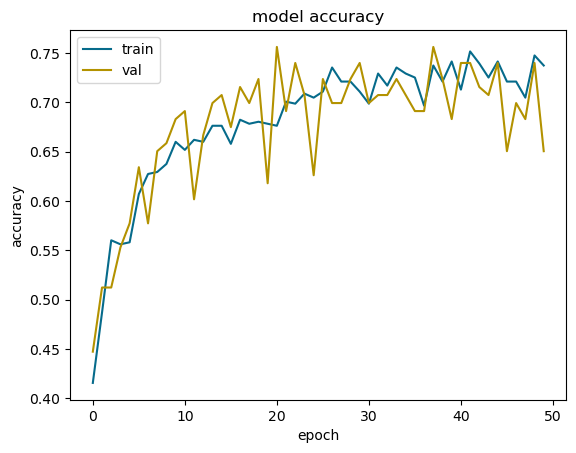

In [25]:
plt.plot(history.history['accuracy'], color='#066b8b')
plt.plot(history.history['val_accuracy'], color='#b39200')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
predictions = model.predict(X_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [27]:
predictions[0]


array([0.90710175], dtype=float32)

In [28]:
predictions = (model.predict(X_test) > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


In [29]:
for i in range(5):
	print('%s => Predicted : %d,  Expected : %d' % (X_test.iloc[i].tolist(), predictions[i], Y_test.iloc[i]))

[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => Predicted : 1,  Expected : 1
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => Predicted : 1,  Expected : 1
[7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484, 32.0] => Predicted : 0,  Expected : 1
[0.0, 118.0, 84.0, 47.0, 230.0, 45.8, 0.551, 31.0] => Predicted : 0,  Expected : 1
[7.0, 107.0, 74.0, 0.0, 0.0, 29.6, 0.254, 31.0] => Predicted : 1,  Expected : 1


In [30]:
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6548 - loss: 0.7294  
Accuracy: 64.29


In [ ]:
# Neural Network with Keras and with an impressive prediction
# See you  😉